In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import sys
import math
import pickle


import itertools


#PERFORMANCE VS NQUBITS FOR ALL GRAPH TYPES - with sorting and tau = 0.3

In [ ]:
num_variables_list = [str(num).zfill(3) for num in range(12,24, 2)] 
graph_type_list = [ '3regular', '050', '070', '080', '090', '095', '100','complete']

r_list = range(400)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = True

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for graph in graph_type_list:

    dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)
    
    sr_array = np.zeros((len(num_opt_list), len(num_variables_list)))
    ar_array = np.zeros(len(num_variables_list))

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            # pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
            # num_pairs = len(pairs_all)
            # num_params = (n_qubits + 2*num_pairs) * layer
            # print(num_pairs, num_params)
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        elif graph == '100':
            density = 1
            num_params = 2*round((N-1)*N*density/2) +N
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for alpha in alpha_list:

            for taui, tau in enumerate(tau_list):
                print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                    .format(num_variables, num_params, layer, alpha)
                
                for r in r_list:
                    # filename = f"./data_sorting/ansatz_type_structure_like_qubo_YZ_2/shots_None/layer_1/alpha_{alpha}/initial_warm_start_measure/r_{r}/tau_{tau}_random.pkl"
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}_entro.pkl'\
                                                            .format(if_adsorting,tau)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    steps_entropy_dict = data["steps_entropy_dict"]
                    
                    final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                    poss_list = list(final_exp_poss.values())
                    if poss_list[0] > alpha:
                        sr_array[0, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:2]) > alpha:
                        sr_array[1, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:3]) > alpha:
                        sr_array[2, n_qubits_i] += 1/len(r_list)

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    ar_array[n_qubits_i] += (cvar/exp_opt) / len(r_list)

    # print("sr_array = ", sr_array)
    ax1.plot(num_variables_list, sr_array[0], "o-", label=f"graph = {graph}")
    # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
    # print("ar_array = ", ar_array)

    ax1.set_title(f'Success rate vs N tau = {tau}, asort={if_adsorting}')
    ax2.set_title('Approximation ratio CVAR vs N')

    ax1.legend()
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()

In [ ]:
from statsmodels.stats.proportion import proportion_confint
p_low, p_upp = proportion_confint(count=sr*N_random, nobs=N_random, alpha=0.05, method="wilson")        
lerror_list.append(sr-p_low)
uerror_list.append(p_upp-sr)
ax1.errorbar(shots_list, y = sr_list, yerr = [lerror_list, uerror_list])

In [ ]:
num_variables_list = [str(num).zfill(3) for num in range(12,24, 2)] 
graph_type_list = [ '3regular', '050', '070', '080', '090', '095', '100','complete']

r_list = range(400)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = True

num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for graph in graph_type_list:

    dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)
    
    sr_array = np.zeros((len(num_opt_list), len(num_variables_list)))
    ar_array = np.zeros(len(num_variables_list))

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        elif graph == '100':
            density = 1
            num_params = 2*round((N-1)*N*density/2) +N
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        for alpha in alpha_list:

            for taui, tau in enumerate(tau_list):
                print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)

                dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                    .format(num_variables, num_params, layer, alpha)
                
                for r in r_list:
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}_entro.pkl'\
                                                            .format(if_adsorting,tau)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    steps_entropy_dict = data["steps_entropy_dict"]
                    
                    final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                    poss_list = list(final_exp_poss.values())
                    if poss_list[0] > alpha:
                        sr_array[0, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:2]) > alpha:
                        sr_array[1, n_qubits_i] += 1/len(r_list)
                    if sum(poss_list[:3]) > alpha:
                        sr_array[2, n_qubits_i] += 1/len(r_list)

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    ar_array[n_qubits_i] += (cvar/exp_opt) / len(r_list)

    # print("sr_array = ", sr_array)
    ax1.plot(num_variables_list, sr_array[0], "o-", label=f"graph = {graph}")
    # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
    # print("ar_array = ", ar_array)

    ax1.set_title(f'Success rate vs N tau = {tau}, asort={if_adsorting}')
    ax2.set_title('Approximation ratio CVAR vs N')

    ax1.legend()
plt.legend()
plt.xlabel("N")
plt.ylabel("success rate")
plt.show()

In [7]:
# Initialize the dictionary using dictionary comprehension
solution_dict = {
'old' : {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]},
'lightcone' :  {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]} }
iteoverlap_dict = {
'old' : {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]},
'lightcone' :  {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]} }


# Initialize the dictionary using dictionary comprehension
results_dict = {
'old' : {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]},
'lightcone' :  {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]} }

graph_type_list = [ '3regular', '050', '070', '080', '090', '095', '100','complete']
num_variables_list = [str(num).zfill(3) for num in range(12,24, 2)] 

results_dict = {
'qubita' : {f'{graph}': [] for graph in graph_type_list}}
print(results_dict)

results_dict = {}

results_dict = {
f'{nqubits}' : {f'{graph}': [] for graph in graph_type_list} for nqubits in num_variables_list}
print(results_dict)

{'qubita': {'3regular': [], '050': [], '070': [], '080': [], '090': [], '095': [], '100': [], 'complete': []}}
{'012': {'3regular': [], '050': [], '070': [], '080': [], '090': [], '095': [], '100': [], 'complete': []}, '014': {'3regular': [], '050': [], '070': [], '080': [], '090': [], '095': [], '100': [], 'complete': []}, '016': {'3regular': [], '050': [], '070': [], '080': [], '090': [], '095': [], '100': [], 'complete': []}, '018': {'3regular': [], '050': [], '070': [], '080': [], '090': [], '095': [], '100': [], 'complete': []}, '020': {'3regular': [], '050': [], '070': [], '080': [], '090': [], '095': [], '100': [], 'complete': []}, '022': {'3regular': [], '050': [], '070': [], '080': [], '090': [], '095': [], '100': [], 'complete': []}}


In [10]:
print(results_dict['022'])

{'3regular': [], '050': [], '070': [], '080': [], '090': [], '095': [], '100': [], 'complete': []}


In [ ]:
density_list = [] 

for graph in graph_type_list:
    if graph == 'complete':
        density =1
    elif graph == '3regular':
        density = ((3*N)/2)/((N-1)*N/2 )
    elif graph == '100':
        density = 1
    else:
        density = float(f"0.{int(graph)}")

    density_list.

In [71]:
r_list = range(100) # range(400)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.01]
layer = 1
shots = None
tot_steps = range(5)
if_adsorting = True

In [152]:
graph_type_list = [ '3regular', '050', '070', '080', '090', '095', '100','complete']
num_variables_list = [str(num).zfill(3) for num in range(12,24, 2)] 

entropy_results_dict = {f'{abs}' : {
f'{nqubits}' : {f'{graph}': [0,0] for graph in graph_type_list} for nqubits in num_variables_list} for abs in [True, False]}
print(entropy_results_dict)

cvar_results_dict =  {f'{abs}' : {
f'{nqubits}' : {f'{graph}': [0,0] for graph in graph_type_list} for nqubits in num_variables_list} for abs in [True, False]}
print(cvar_results_dict)

fidelity_results_dict =  {f'{abs}' : {
f'{nqubits}' : {f'{graph}': [[0,0],[0,0],[0,0]] for graph in graph_type_list} for nqubits in num_variables_list} for abs in [True, False]}
print(fidelity_results_dict)

{'True': {'012': {'3regular': [0, 0], '050': [0, 0], '070': [0, 0], '080': [0, 0], '090': [0, 0], '095': [0, 0], '100': [0, 0], 'complete': [0, 0]}, '014': {'3regular': [0, 0], '050': [0, 0], '070': [0, 0], '080': [0, 0], '090': [0, 0], '095': [0, 0], '100': [0, 0], 'complete': [0, 0]}, '016': {'3regular': [0, 0], '050': [0, 0], '070': [0, 0], '080': [0, 0], '090': [0, 0], '095': [0, 0], '100': [0, 0], 'complete': [0, 0]}, '018': {'3regular': [0, 0], '050': [0, 0], '070': [0, 0], '080': [0, 0], '090': [0, 0], '095': [0, 0], '100': [0, 0], 'complete': [0, 0]}, '020': {'3regular': [0, 0], '050': [0, 0], '070': [0, 0], '080': [0, 0], '090': [0, 0], '095': [0, 0], '100': [0, 0], 'complete': [0, 0]}, '022': {'3regular': [0, 0], '050': [0, 0], '070': [0, 0], '080': [0, 0], '090': [0, 0], '095': [0, 0], '100': [0, 0], 'complete': [0, 0]}}, 'False': {'012': {'3regular': [0, 0], '050': [0, 0], '070': [0, 0], '080': [0, 0], '090': [0, 0], '095': [0, 0], '100': [0, 0], 'complete': [0, 0]}, '014':

In [91]:

for graph in graph_type_list:

    dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        elif graph == '100':
            density = 1
            num_params = 2*round((N-1)*N*density/2) +N
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        print("qubits = ", N, "parameters =", num_params)
            
        for alpha in alpha_list:

            for taui, tau in enumerate(tau_list):
                
                #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                
                dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                    .format(num_variables, num_params, layer, alpha)
                
                for r in r_list:
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}_entro.pkl'\
                                                            .format(if_adsorting,tau)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    steps_entropy_dict = data["steps_entropy_dict"]
                    
                    final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                    poss_list = list(final_exp_poss.values())

                    if poss_list[0] > alpha:
                        fidelity_results_dict[f'{num_variables}'][f'{graph}'][0] += 1/len(r_list)
                    if sum(poss_list[:2]) > alpha:
                        fidelity_results_dict[f'{num_variables}'][f'{graph}'][1] += 1/len(r_list)
                    if sum(poss_list[:3]) > alpha:
                        fidelity_results_dict[f'{num_variables}'][f'{graph}'][2] += 1/len(r_list)

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    cvar_results_dict[f'{num_variables}'][f'{graph}'] += (cvar/exp_opt) / len(r_list)

#     # print("sr_array = ", sr_array)
#     ax1.plot(num_variables_list, sr_array[0], "o-", label=f"graph = {graph}")
#     # ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
#     # ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

#     ax2.plot(num_variables_list, ar_array, "o-", label=f"graph = {graph}")
#     # print("ar_array = ", ar_array)

#     ax1.set_title(f'Success rate vs N tau = {tau}, asort={if_adsorting}')
#     ax2.set_title('Approximation ratio CVAR vs N')

#     ax1.legend()
# plt.legend()
# plt.xlabel("N")
# plt.ylabel("success rate")
# plt.show()

qubits =  12 parameters = 48
qubits =  14 parameters = 56
qubits =  16 parameters = 64
qubits =  18 parameters = 72
qubits =  20 parameters = 80
qubits =  22 parameters = 88
qubits =  12 parameters = 78
qubits =  14 parameters = 106
qubits =  16 parameters = 136
qubits =  18 parameters = 170
qubits =  20 parameters = 210
qubits =  22 parameters = 254
qubits =  12 parameters = 104
qubits =  14 parameters = 142
qubits =  16 parameters = 184
qubits =  18 parameters = 232
qubits =  20 parameters = 286
qubits =  22 parameters = 346
qubits =  12 parameters = 118
qubits =  14 parameters = 160
qubits =  16 parameters = 208
qubits =  18 parameters = 262
qubits =  20 parameters = 324
qubits =  22 parameters = 392
qubits =  12 parameters = 130
qubits =  14 parameters = 178
qubits =  16 parameters = 232
qubits =  18 parameters = 294
qubits =  20 parameters = 362
qubits =  22 parameters = 438
qubits =  12 parameters = 138
qubits =  14 parameters = 186
qubits =  16 parameters = 244
qubits =  18 para

In [41]:
print(fidelity_results_dict)

{'012': {'3regular': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '050': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '070': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '080': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '090': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '095': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '100': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], 'complete': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013]}, '014': {'3regular': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '050': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '070': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '080': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '090': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '095': [2.0000000000000013, 2.0000000000000013, 2.0000000000000013], '

[1.0, 1.0, 0.99, 0.97, 0.94, 0.91]
[0.0, 0.0, 0.0195013954179879, 0.033434480956371804, 0.046546565661405026, 0.0560905943465434]
[0.0, 0.0, 0.01, 0.03, 0.046547, 0.056091]
0.9660905943465434
0.8539094056534566
[1.0, 1.0, 0.96, 0.94, 0.85, 0.93]
[0.0, 0.0, 0.03840729341084248, 0.046546565661405026, 0.06998471259057237, 0.050007896299203325]
[0.0, 0.0, 0.038407, 0.046547, 0.069985, 0.050008]
0.9800078962992034
0.8799921037007967
[1.0, 1.0, 1.0, 0.95, 0.89, 0.83]
[0.0, 0.0, 0.0, 0.04271642470794712, 0.06132526547402428, 0.07362267582748816]
[0.0, 0.0, 0.0, 0.042716, 0.061325, 0.073623]
0.9036226758274881
0.7563773241725118
100


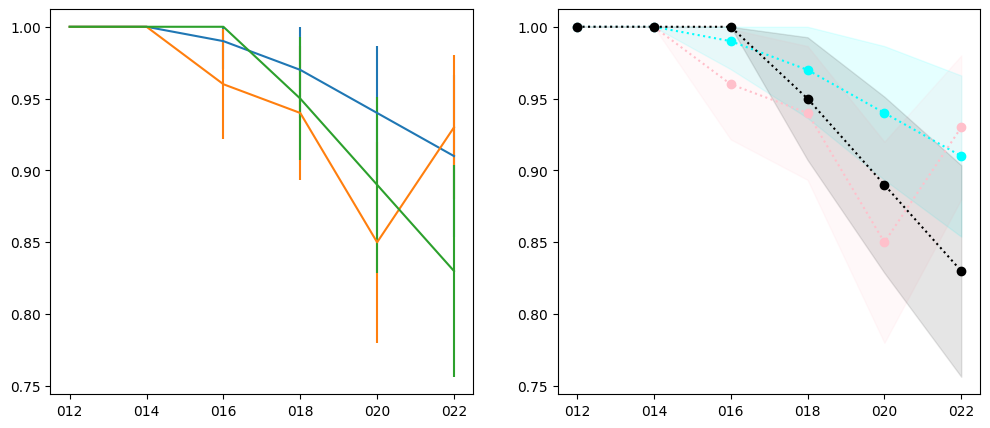

In [88]:
from statsmodels.stats.proportion import proportion_confint

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

color_map = {
    "complete": "blue",
    "3regular": "green",
    "050": "red",
    "070": "purple",
    "080": "orange",
    "090": "cyan",
    "095": "pink",
}

for graph in ['090', '095','100']:

    fidelities = [] 
    lerror_list = []
    uerror_list = []
    lerror_list2 = []
    uerror_list2 = []
    for n_qubits_i, num_variables in enumerate(num_variables_list):
        current_fid = np.round(fidelity_results_dict[f'{num_variables}'][f'{graph}'][0],6)
        p_low, p_upp = proportion_confint(count=current_fid*len(r_list), nobs=len(r_list), alpha=0.05, method="wilson") 
        p_low, p_upp = proportion_confint(count=current_fid*len(r_list), nobs=len(r_list), alpha=0.05, method="normal") 
        fidelities.append(current_fid)      
        lerror_list.append(current_fid-p_low)
        uerror_list.append(np.round(p_upp- current_fid,6))
        lerror_list2.append(p_low)
        uerror_list2.append(p_upp)
    print(fidelities)
    print(lerror_list)
    print(uerror_list)
    print(p_upp)
    print(p_low)
    color = color_map.get(graph, "black")
    ax1.errorbar(num_variables_list, y = fidelities, yerr = [lerror_list, uerror_list])
    ax2.plot(num_variables_list, fidelities,"o:", color=color)
    ax2.fill_between(num_variables_list, lerror_list2, uerror_list2, color=color, alpha=0.1, label="95% CI")
print(len(r_list))

In [ ]:
from statsmodels.stats.proportion import proportion_confint
p_low, p_upp = proportion_confint(count=sr*N_random, nobs=N_random, alpha=0.05, method="wilson")        
lerror_list.append(sr-p_low)
uerror_list.append(p_upp-sr)
ax1.errorbar(shots_list, y = sr_list, yerr = [lerror_list, uerror_list])

[1.0, 1.0, 0.999968, 0.999652, 0.998754, 0.998805]
[0.0, 0.0, 0.0011087053197694763, 0.0036556291573033306, 0.006914111486158059, 0.0067713053331660555]
[0.0, 0.0, 3.2e-05, 0.000348, 0.001246, 0.001195]
[1.0, 1.0, 0.9988592946802305, 0.9959963708426967, 0.991839888513842, 0.992033694666834]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 0.999547, 0.999268, 0.998078, 0.999334]
[0.0, 0.0, 0.004170602527034828, 0.005300839094819598, 0.008584342247259125, 0.005056389692729257]
[0.0, 0.0, 0.000453, 0.000732, 0.001922, 0.000666]
[1.0, 1.0, 0.9953763974729651, 0.9939671609051804, 0.9894936577527409, 0.9942776103072707]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 0.999355, 0.998551, 0.99761]
[0.0, 0.0, 0.0, 0.004976085606620773, 0.007455339227965818, 0.009570341574118069]
[0.0, 0.0, 0.0, 0.000645, 0.001449, 0.00239]
[1.0, 1.0, 1.0, 0.9943789143933792, 0.9910956607720341, 0.9880396584258819]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
100


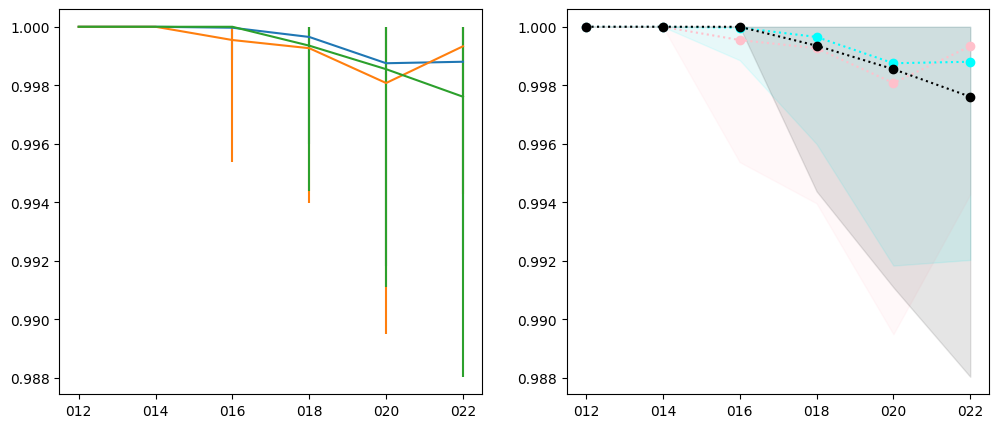

In [93]:
from statsmodels.stats.proportion import proportion_confint

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

color_map = {
    "complete": "blue",
    "3regular": "green",
    "050": "red",
    "070": "purple",
    "080": "orange",
    "090": "cyan",
    "095": "pink",
}

for graph in ['090', '095','100']:

    fidelities = [] 
    lerror_list = []
    uerror_list = []
    lerror_list2 = []
    uerror_list2 = []
    for n_qubits_i, num_variables in enumerate(num_variables_list):
        current_fid = np.round(cvar_results_dict[f'{num_variables}'][f'{graph}'][0],6)
        p_low, p_upp = proportion_confint(count=current_fid*len(r_list), nobs=len(r_list), alpha=0.05, method="wilson") 
        p_low, p_upp = proportion_confint(count=current_fid*len(r_list), nobs=len(r_list), alpha=0.05, method="normal") 
        fidelities.append(current_fid)      
        lerror_list.append(current_fid-p_low)
        uerror_list.append(np.round(p_upp- current_fid,6))
        lerror_list2.append(p_low)
        uerror_list2.append(p_upp)
    print(fidelities)
    print(lerror_list)
    print(uerror_list)
    print(lerror_list2)
    print(uerror_list2)
    color = color_map.get(graph, "black")
    ax1.errorbar(num_variables_list, y = fidelities, yerr = [lerror_list, uerror_list])
    ax2.plot(num_variables_list, fidelities,"o:", color=color)
    ax2.fill_between(num_variables_list, lerror_list2, uerror_list2, color=color, alpha=0.1, label="95% CI")
print(len(r_list))

In [128]:
for graph in graph_type_list:

    dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                            .format(graph,  shots)

    for n_qubits_i, num_variables in enumerate(num_variables_list):
        n_qubits = int(num_variables)

        N = n_qubits
        
        if graph == 'complete':
            num_params = int(2*(N-1)*N/2 + N)
        elif graph == '3regular':
            num_params= int(2*(3*N)/2 + N)
        elif graph == '100':
            density = 1
            num_params = 2*round((N-1)*N*density/2) +N
        else:
            density = float(f"0.{int(graph)}")
            num_params = 2*round((N-1)*N*density/2) +N

        print("qubits = ", N, "parameters =", num_params)
            
        for alpha in alpha_list:

            for taui, tau in enumerate(tau_list):
                
                #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                
                dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                    .format(num_variables, num_params, layer, alpha)
                
                successes = np.zeros((3, len(r_list)))
                # successes2 = np.zeros(len(r_list))
                # successes3 = np.zeros(len(r_list))
                max_entros = []
                cvarvalues = []

                for r in r_list:
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}_entro.pkl'\
                                                            .format(if_adsorting,tau)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]
                    steps_entropy_dict = data["steps_entropy_dict"]
                    
                    final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                    poss_list = list(final_exp_poss.values())

                    if poss_list[0] > alpha:
                        successes[0][r] = 1
                    if sum(poss_list[:2]) > alpha:
                        successes[1][r] = 1
                    if sum(poss_list[:3]) > alpha:
                        successes[2][r] = 1

                    exp_opt = list(final_exp_poss.keys())[0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    cvarvalues.append(cvar/exp_opt)

                    max_key = max(steps_entropy_dict, key=steps_entropy_dict.get)
                    max_entros.append(steps_entropy_dict[max_key])
                
                cvar_results_dict[f'{num_variables}'][f'{graph}'][0] = np.mean(cvarvalues)
                cvar_results_dict[f'{num_variables}'][f'{graph}'][1] = np.std(cvarvalues, axis=0, ddof=1)

                entropy_results_dict[f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                entropy_results_dict[f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

                for i in range(3):
                    fidelity_results_dict[f'{num_variables}'][f'{graph}'][i][0] = np.mean(successes[i])
                    fidelity_results_dict[f'{num_variables}'][f'{graph}'][i][1] = np.std(successes[i], axis=0, ddof=1)



qubits =  12 parameters = 48
qubits =  14 parameters = 56
qubits =  16 parameters = 64
qubits =  18 parameters = 72
qubits =  20 parameters = 80
qubits =  22 parameters = 88
qubits =  12 parameters = 78
qubits =  14 parameters = 106
qubits =  16 parameters = 136
qubits =  18 parameters = 170
qubits =  20 parameters = 210
qubits =  22 parameters = 254
qubits =  12 parameters = 104
qubits =  14 parameters = 142
qubits =  16 parameters = 184
qubits =  18 parameters = 232
qubits =  20 parameters = 286
qubits =  22 parameters = 346
qubits =  12 parameters = 118
qubits =  14 parameters = 160
qubits =  16 parameters = 208
qubits =  18 parameters = 262
qubits =  20 parameters = 324
qubits =  22 parameters = 392
qubits =  12 parameters = 130
qubits =  14 parameters = 178
qubits =  16 parameters = 232
qubits =  18 parameters = 294
qubits =  20 parameters = 362
qubits =  22 parameters = 438
qubits =  12 parameters = 138
qubits =  14 parameters = 186
qubits =  16 parameters = 244
qubits =  18 para

In [153]:
for if_adsorting in [True, False]:
    
    for graph in graph_type_list:

        dir_0 = './data_iter_adap_sorting' + '/graph_{}/shots_{}'\
                                .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            n_qubits = int(num_variables)

            N = n_qubits
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round((N-1)*N*density/2) +N

            print("qubits = ", N, "parameters =", num_params)
                
            for alpha in alpha_list:

                for taui, tau in enumerate(tau_list):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    successes = np.zeros((3, len(r_list)))
                    # successes2 = np.zeros(len(r_list))
                    # successes3 = np.zeros(len(r_list))
                    max_entros = []
                    cvarvalues = []

                    for r in r_list:
                        
                        file_dir_name = dir_name + '/r_{}'\
                                    .format(r)
                        
                        filename = file_dir_name + '/ifadsorting_{}_tau_{}_entro.pkl'\
                                                                .format(if_adsorting,tau)
                        with open(filename, 'rb') as f:
                            data = pickle.load(f)

                        params_list = data["params_list"]
                        if len(params_list) != round(num_params):
                            print("error N, r = ", r, len(params_list))
                            
                        steps_exp_poss_dict = data["steps_exp_poss_dict"]
                        steps_cvar_dict = data["steps_cvar_dict"]
                        steps_entropy_dict = data["steps_entropy_dict"]
                        
                        final_exp_poss = steps_exp_poss_dict[f"step_{len(tot_steps)-1}"]["l_1"]
                        poss_list = list(final_exp_poss.values())

                        if poss_list[0] > alpha:
                            successes[0][r] = 1
                        if sum(poss_list[:2]) > alpha:
                            successes[1][r] = 1
                        if sum(poss_list[:3]) > alpha:
                            successes[2][r] = 1

                        exp_opt = list(final_exp_poss.keys())[0]
                        cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                        cvarvalues.append(cvar/exp_opt)

                        max_key = max(steps_entropy_dict, key=steps_entropy_dict.get)
                        max_entros.append(steps_entropy_dict[max_key])
                    
                    cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(cvarvalues)
                    cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(cvarvalues, axis=0, ddof=1)

                    entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

                    for i in range(3):
                        fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][0] = np.mean(successes[i])
                        fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][1] = np.std(successes[i], axis=0, ddof=1)

qubits =  12 parameters = 48
qubits =  14 parameters = 56
qubits =  16 parameters = 64
qubits =  18 parameters = 72
qubits =  20 parameters = 80
qubits =  22 parameters = 88
qubits =  12 parameters = 78
qubits =  14 parameters = 106
qubits =  16 parameters = 136
qubits =  18 parameters = 170
qubits =  20 parameters = 210
qubits =  22 parameters = 254
qubits =  12 parameters = 104
qubits =  14 parameters = 142
qubits =  16 parameters = 184
qubits =  18 parameters = 232
qubits =  20 parameters = 286
qubits =  22 parameters = 346
qubits =  12 parameters = 118
qubits =  14 parameters = 160
qubits =  16 parameters = 208
qubits =  18 parameters = 262
qubits =  20 parameters = 324
qubits =  22 parameters = 392
qubits =  12 parameters = 130
qubits =  14 parameters = 178
qubits =  16 parameters = 232
qubits =  18 parameters = 294
qubits =  20 parameters = 362
qubits =  22 parameters = 438
qubits =  12 parameters = 138
qubits =  14 parameters = 186
qubits =  16 parameters = 244
qubits =  18 para

FileNotFoundError: [Errno 2] No such file or directory: './data_iter_adap_sorting/graph_050/shots_None/num_variables_016/params_136_layer_1/alpha_0.01/r_0/ifadsorting_False_tau_0.3_entro.pkl'

In [118]:
for x in num_variables_list:
    print(cvar_results_dict[f'{x}']['090'])
print("\n")
for x in num_variables_list:
    print(entropy_results_dict[f'{x}']['090'])
print("\n")
for x in num_variables_list:
    print(fidelity_results_dict[f'{x}']['090'])

[1.0, 7.810712861838192e-17]
[1.0, 1.1158161231197418e-17]
[0.9999684004245938, 0.0003159957540622391]
[0.9996516494081357, 0.0023947447476943763]
[0.9987544250703951, 0.006559159824429137]
[0.998804914207314, 0.004664331223479647]


[2.3235833424999885, 0.21722600597026762]
[2.924429574512849, 0.24127925282102736]
[3.503775119552107, 0.2346735120130694]
[3.936001434091926, 0.25289170479372186]
[4.706054581153312, 0.2933656859545828]
[5.365037614410056, 0.3148984296697226]


[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
[[0.99, 0.09999999999999999], [1.0, 0.0], [1.0, 0.0]]
[[0.97, 0.1714466079977653], [1.0, 0.0], [1.0, 0.0]]
[[0.94, 0.23868325657594203], [0.97, 0.1714466079977653], [0.98, 0.14070529413628968]]
[[0.91, 0.2876234912646614], [0.98, 0.14070529413628965], [0.99, 0.09999999999999999]]


In [120]:
print(fidelity_results_dict)

{'012': {'3regular': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '050': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '070': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '080': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '090': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '095': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '100': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], 'complete': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]}, '014': {'3regular': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '050': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '070': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '080': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '090': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '095': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '100': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], 'complete': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]}, '016': {'3regular': [[0.97, 0.17144660799776532], [1.0, 0.0], [1.0, 0.0]], '050': [[0.99, 0.1], [1.0, 0.0], [1.0, 0.0]], '070': [[0.98, 0.14070529413628968], [1.0, 0.0], [1.0, 0.0]], '080': [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]], '090': [[0.99

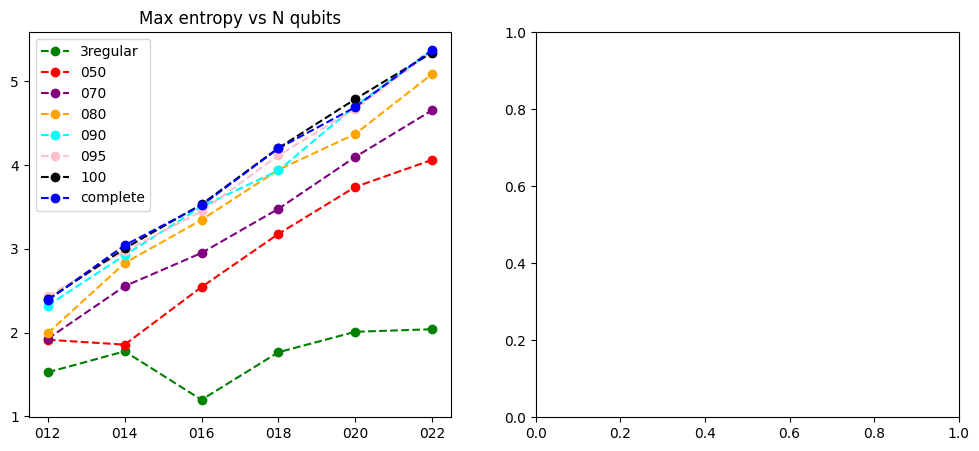

In [149]:
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for graph in graph_type_list:
    color = color_map.get(graph, "black")
    entropies = []
    for nqubits in num_variables_list:
        entropies.append(entropy_results_dict[f'{nqubits}'][graph][0])
    ax1.plot(num_variables_list, entropies, "o--", color = color, label = f'{graph}')
    ax1.set_title('Max entropy vs N qubits')
ax1.legend()
